In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [2]:
# Load input data
text = np.loadtxt('data_vector_quantization.txt')

In [3]:
# Separate it into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [4]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [5]:
# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [6]:
# Create the input grid
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [7]:
# Evaluate the input grid of points
grid_eval = nn.sim(grid_xy)

In [8]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [9]:
# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

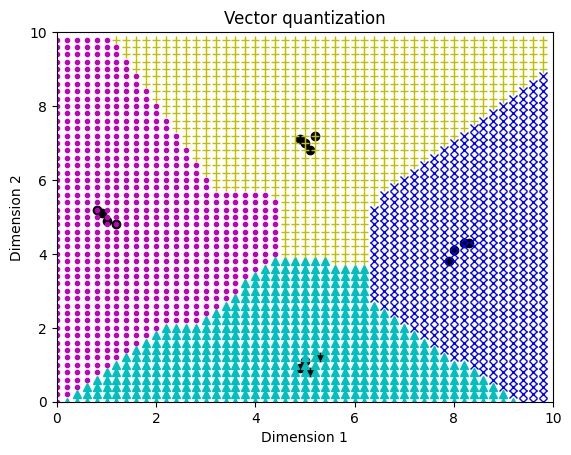

In [10]:
# Plot the outputs
plt.plot(class_1[:,0], class_1[:,1], 'ko',
class_2[:,0], class_2[:,1], 'ko',
class_3[:,0], class_3[:,1], 'ko',
class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
grid_2[:,0], grid_2[:,1], 'bx',
grid_3[:,0], grid_3[:,1], 'c^',
grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')
plt.show()